In [128]:
import sys

In [129]:
sys.path.append('../../source/')

In [130]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
%matplotlib inline

In [132]:
import seaborn as sns

In [133]:
sns.set_style(style='darkgrid')

Exploratory Data Analysis

In [134]:
from Hedge import Hedge

Initialize an Hedge instance within which stock data are stored.

In [135]:
hedge_all = Hedge('../../data/all_stocks.csv','../../data/spy.csv', begindate='2013-01-01', enddate='2014-12-31')
hedge = Hedge('../../data/all_stocks.csv','../../data/spy.csv', begindate='2013-01-01', enddate='2013-12-31')
hedge_2 = Hedge('../../data/all_stocks.csv','../../data/spy.csv', begindate='2014-01-01', enddate='2014-12-31')


In [136]:
hedge_all.generateRandomMarket(40)

array(['CLNY', 'DV', 'GSI', 'MAIN', 'CUBN', 'LMNX', 'ED', 'FFNW', 'PULB',
       'FSFG', 'ELY', 'IRM', 'AEZS', 'SHPG', 'CBB', 'SBY', 'ECOL', 'PVCT',
       'BJZ', 'SOL', 'DKL', 'DGX', 'FDT', 'HJV', 'SCZ', 'HRT', 'ATOS',
       'PRE', 'MITL', 'CSCO', 'CLR', 'NGD', 'IFN', 'BBL', 'NYV', 'EVJ',
       'HWAY', 'IGD', 'OXGN', 'CPLP'], dtype=object)

In [137]:
hedge_all.generateRandomPort()

array(['TQQQ', 'ABIO', 'MHO', 'NBH', 'ENRJ', 'DMRC', 'IVC', 'MMC', 'EDD',
       'NKX', 'XOMA', 'WEC', 'LMAT', 'TBBK', 'MHY', 'LDL', 'ENB', 'MAN',
       'MED', 'CPS'], dtype=object)

In [138]:
# hedge.market = hedge_all.market[:]
# hedge_2.market = hedge_all.market[:]
# hedge.portfolio = hedge_all.portfolio[:]
# hedge_2.portfolio = hedge_all.portfolio[:]

In [139]:
hedge.market = ['SAN', 'HSTM', 'IHD', 'FTEK', 'F', 'AAL', 'VHC', 'JOB', 'PRSC',
       'MIY', 'CERS', 'BIN', 'MYL', 'RBCN', 'ARIA', 'CHEV', 'SWC', 'BOXC',
       'USAP', 'GBLI', 'PDI', 'ESXB', 'JPM', 'FDT', 'HOLX', 'DV', 'DNI',
       'CBMG', 'CPAH', 'TROW', 'FICO', 'CEB', 'TOF', 'SWC', 'ZGNX', 'BTG',
       'HEP', 'RHI', 'MUE', 'WTR']
hedge_2.market = ['SAN', 'HSTM', 'IHD', 'FTEK', 'F', 'AAL', 'VHC', 'JOB', 'PRSC',
       'MIY', 'CERS', 'BIN', 'MYL', 'RBCN', 'ARIA', 'CHEV', 'SWC', 'BOXC',
       'USAP', 'GBLI', 'PDI', 'ESXB', 'JPM', 'FDT', 'HOLX', 'DV', 'DNI',
       'CBMG', 'CPAH', 'TROW', 'FICO', 'CEB', 'TOF', 'SWC', 'ZGNX', 'BTG',
       'HEP', 'RHI', 'MUE', 'WTR']
hedge.portfolio = ['MRCC', 'HMPR', 'AIG', 'MLSS', 'RELV', 'BSPM', 'MYJ', 'SGEN',
       'SILC', 'SGOC', 'XYL', 'BGC', 'PRKR', 'ERF', 'MMT', 'MEET', 'SCS',
       'LINE', 'AFL', 'STL']
hedge_2.portfolio = ['MRCC', 'HMPR', 'AIG', 'MLSS', 'RELV', 'BSPM', 'MYJ', 'SGEN',
       'SILC', 'SGOC', 'XYL', 'BGC', 'PRKR', 'ERF', 'MMT', 'MEET', 'SCS',
       'LINE', 'AFL', 'STL']

Plotting the market data - or SPY (SPDR S&P 500 ETF Trust)

In [140]:
import pandas as pd

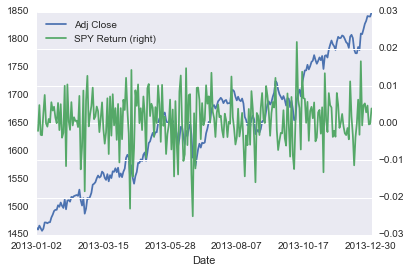

In [141]:
spydf = pd.DataFrame(hedge.spy.copy())
spydf.rename(columns={'Adj Close': 'SPY'})
spydf['SPY Return'] = spydf.pct_change()
spydf.plot(secondary_y='SPY Return')
plt.xlabel('Date')
# plt.savefig('./Figures/0404/SPY.png')

Plot portfolio data.

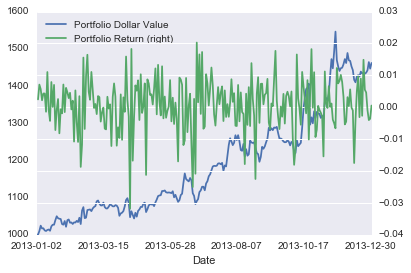

In [142]:
portdf = pd.DataFrame([hedge.dollar_portfolio_sum, hedge.dollar_market_sum_ret]).transpose()
portdf.columns = ['Portfolio Dollar Value', 'Portfolio Return']
portdf.plot(secondary_y='Portfolio Return')
plt.xlabel('Date')
# plt.savefig('./Figures/0404/Port.png')

Plot Initial Market

In [143]:
# hedge.market = ['GPX', 'GRMN', 'MPWR', 'ENR', 'CTHR', 'PRFZ', 'SUMR', 'CUBE',
#        'ACTS', 'ANF', 'MYI', 'SON', 'SSL', 'PW', 'KT', 'TWN', 'IPWR',
#        'AAN', 'CASH', 'DISCA', 'RFP', 'HPS', 'WMB', 'VRSN', 'ETN', 'WPZ',
#        'RAI', 'BOXC', 'ARCI', 'EMN', 'LMOS', 'EXPD', 'NQS', 'GB', 'KNOP',
#        'CNL', 'ENDP', 'SPSC', 'SCVL', 'EPAY']

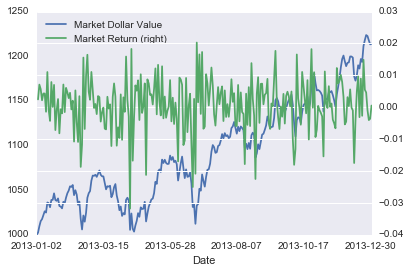

In [144]:
marketdf = pd.DataFrame([hedge.dollar_market_sum, hedge.dollar_market_sum_ret]).transpose()
marketdf.columns = ['Market Dollar Value', 'Market Return']
marketdf.plot(secondary_y='Market Return')
plt.xlabel('Date')
# plt.savefig('./Figures/0404/Initial_market.png')

---
Simulated annealing

In [145]:
import Simulation
from energy_functions import *

In [146]:
from BetaUtils import get_beta, beta_hedging_ret, cum_ret

In [147]:
%%time
# hedge.market = ['GPX', 'GRMN', 'MPWR', 'ENR', 'CTHR', 'PRFZ', 'SUMR', 'CUBE',
#        'ACTS', 'ANF', 'MYI', 'SON', 'SSL', 'PW', 'KT', 'TWN', 'IPWR',
#        'AAN', 'CASH', 'DISCA', 'RFP', 'HPS', 'WMB', 'VRSN', 'ETN', 'WPZ',
#        'RAI', 'BOXC', 'ARCI', 'EMN', 'LMOS', 'EXPD', 'NQS', 'GB', 'KNOP',
#        'CNL', 'ENDP', 'SPSC', 'SCVL', 'EPAY']

st_sharpe, bm_sharpe = Simulation.simulated_annealing(hedge, 
                                                      init_temp=0.01, 
                                                      min_temp=0.001, 
                                                      cool_by=0.9, 
                                                      reanneal=10, 
                                                      num_iter=2000, 
                                                      energy_func=neg_sharpe)





#### Change your energy function here


0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290


In [148]:
st_sharpe_300, bm_sharpe_300 = st_sharpe, bm_sharpe

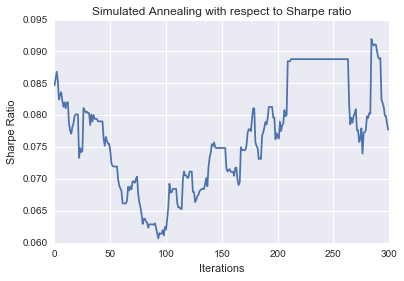

In [149]:
plt.plot(-st_sharpe)
plt.xlabel('Iterations')
plt.ylabel('Sharpe Ratio')
plt.title('Simulated Annealing with respect to Sharpe ratio')
# plt.savefig('./Figures/0404/Sharpe_sim.png')

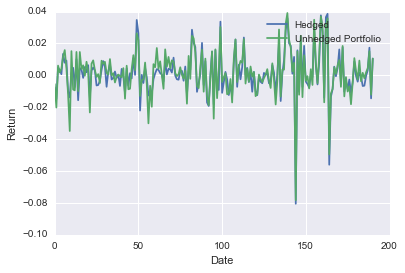

In [150]:
hedge.market = bm_sharpe

_, betas = get_beta(hedge.dollar_portfolio_sum_ret, hedge.dollar_market_sum_ret)
bhr = beta_hedging_ret(betas[1:], hedge.dollar_portfolio_sum_ret[61:], hedge.dollar_market_sum_ret[61:])

_, betas_sp = get_beta(hedge.dollar_portfolio_sum_ret, hedge.spy.pct_change())
bhr_sp = beta_hedging_ret(betas[1:], hedge.dollar_portfolio_sum_ret[61:], hedge.spy.pct_change()[61:])

plt.plot(bhr, label = 'Hedged')
plt.plot(hedge.dollar_portfolio_sum_ret[61:].values, label = 'Unhedged Portfolio')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
# plt.savefig('./Figures/0404/Sharpe_Ret.png')

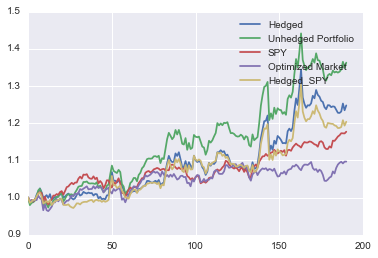

In [151]:
plt.plot(cum_ret(bhr), label = 'Hedged')
plt.plot(cum_ret(hedge.dollar_portfolio_sum_ret[61:].values), label = 'Unhedged Portfolio')
plt.plot(cum_ret(hedge.spy.pct_change()[61:].values), label = 'SPY')
plt.plot(cum_ret(hedge.dollar_market_sum_ret[61:].values), label = 'Optimized Market')
plt.plot(cum_ret(bhr_sp), label = 'Hedged_SPY')
plt.legend()
# plt.savefig('./Figures/0404/Sharpe_cum_ret.png')

In [152]:
print 'Hedged Sharpe:', -neg_sharpe((bhr))
print 'Hedged against SPY Sharpe:', -neg_sharpe(bhr_sp)
print 'Unhedged Sharpe:', -neg_sharpe(hedge.dollar_portfolio_sum_ret[61:])
print
print 'Hedged Correlation:', correlation(bhr, hedge.spy.pct_change()[61:].values)
print 'Hedged against SPY Correlation:', correlation(bhr_sp, hedge.spy.pct_change()[61:].values)
print 'Unhedged Correlation:', correlation(hedge.dollar_portfolio_sum_ret[61:], hedge.spy.pct_change()[61:].values)
print 
print 'Hedged Volatility:', volatility(bhr)
print 'Hedged against SPY Volatility:', volatility(bhr_sp)
print 'Unhedged Volatility:', volatility(hedge.dollar_portfolio_sum_ret[61:])
print 
print 'Hedged Returns:', cum_ret(bhr)[-1]
print 'Hedged against SPY Returns:', cum_ret(bhr_sp)[-1]
print 'Unhedged Returns:', cum_ret(hedge.dollar_market_sum_ret[61:])[-1]

Hedged Sharpe: 0.088693041706
Hedged against SPY Sharpe: 0.0761831299446
Unhedged Sharpe: 0.117847845627

Hedged Correlation: 0.109807994425
Hedged against SPY Correlation: 0.068150306858
Unhedged Correlation: 0.396761276859

Hedged Volatility: 0.0136859975563
Hedged against SPY Volatility: 0.013349844741
Unhedged Volatility: 0.0144060723149

Hedged Returns: 1.24779291516
Hedged against SPY Returns: 1.20388734183
Unhedged Returns: 1.09676405568


In [153]:
sharpe_market_hedged = -neg_sharpe((bhr))
sharpe_spy_hedged = -neg_sharpe(bhr_sp)
sharpe_unhedged = -neg_sharpe(hedge.dollar_portfolio_sum_ret[61:])
sharpe_spy = -neg_sharpe(hedge.spy.pct_change()[61:])


correlation_market_hedged = correlation(bhr, hedge.spy.pct_change()[61:].values)
correlation_spy_hedged = correlation(bhr_sp, hedge.spy.pct_change()[61:].values)
correlation_unhedged = correlation(hedge.dollar_portfolio_sum_ret[61:], hedge.spy.pct_change()[61:].values)
correlation_spy = correlation(hedge.spy.pct_change()[61:], hedge.spy.pct_change()[61:].values)


volatility_market_hedged = volatility(bhr)
volatility_spy_hedged = volatility(bhr_sp)
volatility_unhedged = volatility(hedge.dollar_portfolio_sum_ret[61:])
volatility_spy = volatility(hedge.spy.pct_change()[61:])


returns_market_hedged = cum_ret(bhr)[-1] - 1
returns_spy_hedged = cum_ret(bhr_sp)[-1] - 1
returns_unhedged = cum_ret(hedge.dollar_portfolio_sum_ret[61:])[-1] - 1
returns_spy = cum_ret(hedge.spy.pct_change()[61:])[-1] - 1


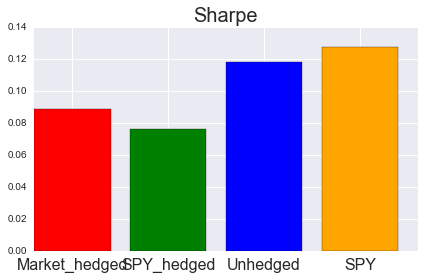

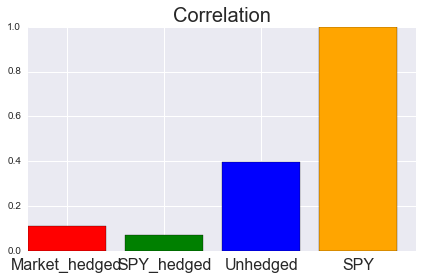

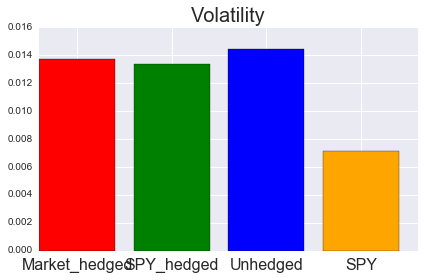

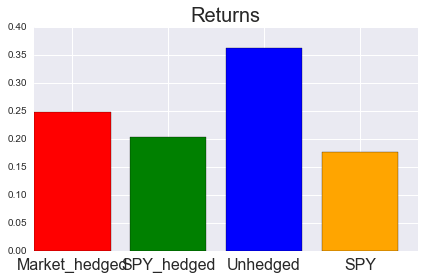

In [154]:
for metric in ['sharpe','correlation','volatility','returns']:
    market_hedged = locals()[metric+'_market_hedged']
    spy_hedged = locals()[metric+'_spy_hedged']
    unhedged = locals()[metric+'_unhedged']
    spy = locals()[metric+'_spy']
    plt.bar([0,1,2,3],[market_hedged, spy_hedged, unhedged, spy], color=['r','g','b','orange'])
    plt.xticks(np.array([0,1,2,3]) + 0.4, ('Market_hedged', 'SPY_hedged', 'Unhedged', 'SPY'), fontsize = 16)

    plt.title(metric.capitalize(), fontsize=20)
    plt.tight_layout()
    plt.show()

In [155]:
hedge_2.market = bm_sharpe_300

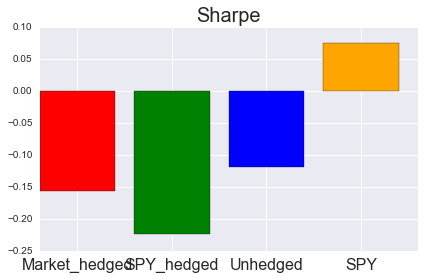

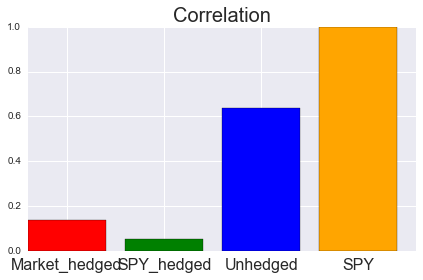

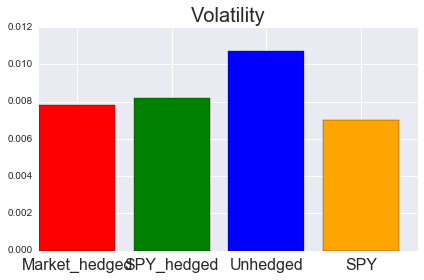

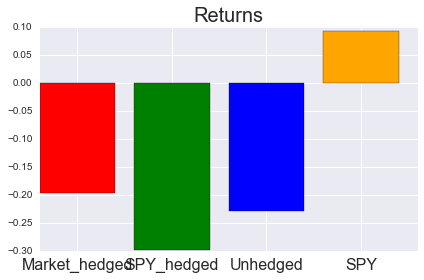

In [156]:
hedge_2.market = bm_sharpe_300

_, betas = get_beta(hedge_2.dollar_portfolio_sum_ret, hedge_2.dollar_market_sum_ret)
bhr = beta_hedging_ret(betas[1:], hedge_2.dollar_portfolio_sum_ret[61:], hedge_2.dollar_market_sum_ret[61:])

_, betas_sp = get_beta(hedge_2.dollar_portfolio_sum_ret, hedge_2.spy.pct_change())
bhr_sp = beta_hedging_ret(betas[1:], hedge_2.dollar_portfolio_sum_ret[61:], hedge_2.spy.pct_change()[61:])


sharpe_market_hedged = -neg_sharpe((bhr))
sharpe_spy_hedged = -neg_sharpe(bhr_sp)
sharpe_unhedged = -neg_sharpe(hedge_2.dollar_portfolio_sum_ret[61:])
sharpe_spy = -neg_sharpe(hedge_2.spy.pct_change()[61:])

correlation_market_hedged = correlation(bhr, hedge_2.spy.pct_change()[61:].values)
correlation_spy_hedged = correlation(bhr_sp, hedge_2.spy.pct_change()[61:].values)
correlation_unhedged = correlation(hedge_2.dollar_portfolio_sum_ret[61:], hedge_2.spy.pct_change()[61:].values)
correlation_spy = correlation(hedge_2.spy.pct_change()[61:], hedge_2.spy.pct_change()[61:].values)

volatility_market_hedged = volatility(bhr)
volatility_spy_hedged = volatility(bhr_sp)
volatility_unhedged = volatility(hedge_2.dollar_portfolio_sum_ret[61:])
volatility_spy = volatility(hedge_2.spy.pct_change()[61:])

returns_market_hedged = cum_ret(bhr)[-1] - 1
returns_spy_hedged = cum_ret(bhr_sp)[-1] - 1
returns_unhedged = cum_ret(hedge_2.dollar_portfolio_sum_ret[61:])[-1] - 1
returns_spy = cum_ret(hedge_2.spy.pct_change()[61:])[-1] - 1



for metric in ['sharpe','correlation','volatility','returns']:
    market_hedged = locals()[metric+'_market_hedged']
    spy_hedged = locals()[metric+'_spy_hedged']
    unhedged = locals()[metric+'_unhedged']
    spy = locals()[metric+'_spy']
    plt.bar([0,1,2,3],[market_hedged, spy_hedged, unhedged, spy], color=['r','g','b','orange'])
    plt.xticks(np.array([0,1,2,3]) + 0.4, ('Market_hedged', 'SPY_hedged', 'Unhedged', 'SPY'), fontsize = 16)

    plt.title(metric.capitalize(), fontsize=20)
    plt.tight_layout()
    plt.show()